In [24]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

# Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [35]:
# Load the data set
data = pd.read_csv('Linear_Regression_House_Dataset.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
# Print the shape of dataset
print(data.shape)


(4600, 18)


In [12]:
# Make a list of important features which is need to be included in training data
imp_feature = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
     'yr_renovated']

data = data[imp_feature]
print(data.shape)

(4600, 10)


In [13]:
# Drop the missing values
data = data.dropna()
print(data.shape)

(4600, 10)


In [14]:
# Get statictial information about the dataset
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.512065,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,0.538288,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,2.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [53]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

# list of variables that contain year information
yr_feature = [feature for feature in numerical_features if 'yr' in feature or 'Year' in feature]
yr_feature

['yr_built', 'yr_renovated']

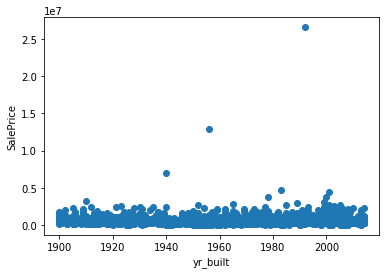

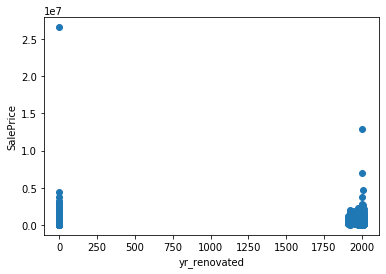

In [57]:
for feature in yr_feature:
    if feature!='YrSold':
        dataset = data.copy()
        # We will capture the difference between year variable and year the house was sold for
    
        plt.scatter(dataset[feature], dataset['price'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [59]:
# Now , divide the dataset into two parts : independent variables(x) and dependent variables(y)
X = data[imp_feature[1:]]
Y = data['price']
print(X)

      bedrooms  bathrooms  sqft_living  floors  condition  sqft_above  \
0          3.0       1.50         1340     1.5          3        1340   
1          5.0       2.50         3650     2.0          5        3370   
2          3.0       2.00         1930     1.0          4        1930   
3          3.0       2.25         2000     1.0          4        1000   
4          4.0       2.50         1940     1.0          4        1140   
...        ...        ...          ...     ...        ...         ...   
4595       3.0       1.75         1510     1.0          4        1510   
4596       3.0       2.50         1460     2.0          3        1460   
4597       3.0       2.50         3010     2.0          3        3010   
4598       4.0       2.00         2090     1.0          3        1070   
4599       3.0       2.50         1490     2.0          4        1490   

      sqft_basement  yr_built  yr_renovated  
0                 0      1955          2005  
1               280      1921  

In [60]:
print(Y)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [61]:
# Split the dataset into traning data and test data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(3680, 9)
(920, 9)
(3680,)
(920,)


In [69]:
# Fit the regression model
lr = LinearRegression()
lr.fit(X_train,Y_train)  # Relationship between independent and dependent feature(SalePrice)
print(lr.coef_)
print(lr)

[-7.34290433e+04  4.08765071e+04  2.00843741e+02  7.95669395e+04
  2.83940455e+04  9.14297117e+01  1.09414029e+02 -2.81179874e+03
  9.76260872e+00]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [64]:
# Create the predictions
Y_test_predict = lr.predict(X_test)
print(Y_test_predict.shape)

(920,)


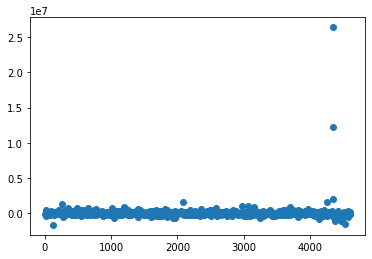

In [66]:
#Plot the error
g = plt.plot((Y_test - Y_test_predict),marker='o',linestyle='')

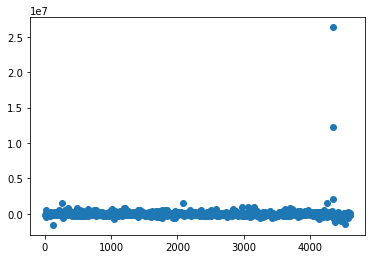

In [68]:
# Fit the regression model without b(w0)
lr = LinearRegression(fit_intercept = False)
lr.fit(X_train, Y_train)

Y_test_predict = lr.predict(X_test)

g=plt.plot((Y_test - Y_test_predict),marker='o',linestyle='')